In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

# Read data from excel file

In [2]:
bird_strike_data = pd.read_excel("Bird Strikes_Final.xlsx")

# Analyzing and Cleaning the data

### View first 5 rows data 

In [3]:
bird_strike_data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


### Finding shape of data 

In [4]:
bird_strike_data.shape

(25558, 26)

### copy the data frame into another data frame 

In [5]:
bs = bird_strike_data.copy()

In [6]:
bs.shape

(25558, 26)

### Viewing description of the data and column information 

In [7]:
bs.describe()

,Record ID,Wildlife: Number Struck Actual,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,799.028432,0.001056
std,38510.453382,12.793975,1.219713e+05,1740.079843,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


In [8]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

### Checking for missing values 

In [9]:
miss = bs.isnull().sum()
miss_p = (bs.isnull().sum()/len(bs))*100
miss_data = pd.concat([miss,miss_p],axis = 1,keys = ['Total','%'])
print(miss_data)

                                         Total          %
Record ID                                    0   0.000000
Aircraft: Type                             129   0.504734
Airport: Name                              129   0.504734
Altitude bin                               129   0.504734
Aircraft: Make/Model                         0   0.000000
Wildlife: Number struck                    129   0.504734
Wildlife: Number Struck Actual               0   0.000000
Effect: Impact to flight                   129   0.504734
FlightDate                                 129   0.504734
Effect: Indicated Damage                     0   0.000000
Aircraft: Number of engines?               267   1.044683
Aircraft: Airline/Operator                 129   0.504734
Origin State                               449   1.756788
When: Phase of flight                      129   0.504734
Conditions: Precipitation                    0   0.000000
Remains of wildlife collected?               0   0.000000
Remains of wil

### Checking for duplicate value  

In [10]:
bs.duplicated().sum()

0

No duplicate data found.

### Checking Unique Column values Which have missing values

###### Checking column 'Aircraft: Type' 

In [11]:
bs['Aircraft: Type'].unique()

array(['Airplane', nan], dtype=object)

'Aircraft: Type' column only have one unique valid value <b>'Airplane'</b>. It also contain <b>NaN</b> which indicate missing values.

###### Checking column 'Airport: Name' 

In [12]:
bs['Airport: Name'].unique()

array(['LAGUARDIA NY', 'DALLAS/FORT WORTH INTL ARPT', 'LAKEFRONT AIRPORT',
       ..., 'LAKE PALOURDE BASE HELIPORT', 'CULPEPER REGIONAL ARPT',
       'PRINCESS JULIANA'], dtype=object)

'Airport: Name' contain many unique values to show.

In [13]:
len(bs['Airport: Name'].unique())

1110

There are total <b>1110</b> different unique Airport.

###### Checking column 'Altitude bin'  

In [14]:
bs['Altitude bin'].unique()

array(['> 1000 ft', '< 1000 ft', nan], dtype=object)

'Altitude bin' column have only 2 unique valid value. It also contain <b>NaN</b> which indicate missing values.

###### Checking column 'Wildlife: Number struck'   

In [15]:
bs['Wildlife: Number struck'].unique()

array(['Over 100', '2 to 10', nan, '11 to 100', 1], dtype=object)

'Wildlife: Number struck' column have only 4 unique valid value. It also contain <b>NaN</b> which indicate missing values.

######  Checking column 'Effect: Impact to flight'  

In [16]:
bs['Effect: Impact to flight'].unique()

array(['Engine Shut Down', 'None', 'Precautionary Landing', 'Other',
       'Aborted Take-off', nan], dtype=object)

'Effect: Impact to flight' column have only 5 unique valid value. It also contain <b>NaN</b> which indicate missing values.

###### Checking column 'FlightDate'   

In [17]:
bs['FlightDate'].unique()

array(['2000-11-23T00:00:00.000000000', '2001-07-25T00:00:00.000000000',
       '2001-09-14T00:00:00.000000000', ...,
       '2011-12-19T00:00:00.000000000', '2011-12-21T00:00:00.000000000',
       '2011-12-26T00:00:00.000000000'], dtype='datetime64[ns]')

'FlightDate' contain many unique values to show.

In [18]:
len(bs['FlightDate'].unique())

4226

There are total <b>4226</b> different unique FlightDate.

###### Checking column 'Aircraft: Number of engines?'   

In [19]:
bs['Aircraft: Number of engines?'].unique()

array([2, 3, 4, nan, 1, 'C'], dtype=object)

'Aircraft: Number of engines?' column have only 5 unique valid value. It also contain <b>NaN</b> which indicate missing values.

###### Checking column 'Aircraft: Airline/Operator'   

In [20]:
bs['Aircraft: Airline/Operator'].unique()

array(['US AIRWAYS*', 'AMERICAN AIRLINES', 'BUSINESS', 'ALASKA AIRLINES',
       'COMAIR AIRLINES', 'UNITED AIRLINES', 'AIRTRAN AIRWAYS',
       'AIRTOURS INTL', 'AMERICA WEST AIRLINES', 'EXECUTIVE JET AVIATION',
       'TRANS WORLD AIRLINES', 'HAWAIIAN AIR', 'DELTA AIR LINES',
       'AIR TRANSAT', 'MESABA AIRLINES', 'CONTINENTAL AIRLINES',
       'NORTHWEST AIRLINES', 'ABX AIR', 'AMERICAN EAGLE AIRLINES',
       'EXPRESSJET (CONTINENTAL EXPRS)', 'MILITARY', 'ALOHA AIRLINES',
       'ATLAS AIR', 'PRIVATELY OWNED', 'UPS AIRLINES', 'FEDEX EXPRESS',
       'CHAUTAUQUA AIRLINES', 'ATLANTIC COAST AIRLINES',
       'SOUTHWEST AIRLINES', 'GREAT LAKES AIRLINES', 'UNKNOWN',
       'ATA AIRLINES', 'AIR WISCONSIN AIRLINES', 'CAPE AIR',
       'ATLANTIC SOUTHEAST', 'TRANSMERIDIAN AIRLINES', 'AMERIFLIGHT',
       'PINNACLE', nan, 'HORIZON AIR', 'EVERGREEN INTL AIRLINES',
       'LEGEND AIRLINES', 'CCAIR', 'FRONTIER AIRLINES', 'SKYWAY AIRLINES',
       'PAN AM', 'VANGUARD AIRLINES', 'ASTAR AIR CARG

In [21]:
len(bs['Aircraft: Airline/Operator'].unique())

293

There are total <b>293</b> different unique Airline/Operator.

###### Checking column 'Origin State'   

In [22]:
bs['Origin State'].unique()

array(['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', nan,
       'Delaware', 'DC', 'Georgia', 'Florida', 'California', 'Illinois',
       'Connecticut', 'Missouri', 'Rhode Island', 'Hawaii', 'Arizona',
       'Tennessee', 'South Carolina', 'South Dakota', 'New Jersey',
       'Colorado', 'Minnesota', 'Alabama', 'Ohio', 'Wisconsin',
       'Michigan', 'Massachusetts', 'Alaska', 'North Carolina',
       'Kentucky', 'Indiana', 'Oregon', 'Pennsylvania', 'New Hampshire',
       'Arkansas', 'Nevada', 'Mississippi', 'Maryland', 'Maine', 'Quebec',
       'Idaho', 'British Columbia', 'Utah', 'Nebraska', 'Iowa',
       'New Mexico', 'West Virginia', 'Oklahoma', 'North Dakota',
       'Vermont', 'Wyoming', 'Kansas', 'Prince Edward Island', 'Montana',
       'Puerto Rico', 'Ontario', 'Virgin Islands',
       'Newfoundland and Labrador', 'Alberta', 'Saskatchewan'],
      dtype=object)

In [23]:
len(bs['Origin State'].unique())

61

There are total <b>61</b> different unique Origin State.

###### Checking column 'When: Phase of flight'   

In [24]:
bs['When: Phase of flight'].unique()

array(['Climb', 'Landing Roll', 'Approach', 'Take-off run', 'Descent',
       nan, 'Taxi', 'Parked'], dtype=object)

'When: Phase of flight' column have only 7 unique valid value. It also contain <b>NaN</b> which indicate missing values.

###### Checking column 'Remarks'   

In [25]:
bs['Remarks'].unique()

array(['FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN TYPE. #1 ENG WAS SHUT DOWN AND DIVERTED TO EWR. SLIGHT VIBRATION. A/C WAS OUT OF SVC FOR REPAIRS TO COWLING, FAN DUCT ACCOUSTIC PANEL. INGESTION. DENTED FAN BLADE #26 IN #1 ENG. HEAVY BLOOD STAINS ON L WINGTIP',
       '102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR WAS DAMAGED AND REPLACED.',
       'FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER APCH END OF RWY. NO DMG. JUST A LOT OF BIRD DROPPINGS ON WINDSCREEN.',
       ...,
       'STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD AS BROWN/WHITE. TWY.',
       'PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L BTWN TWY F & J. NO REMAINS FOUND ON RWY OR ON A/C. NO DMG TO A/C.',
       'HIT CENTER OF RADOME, CAVING IN ABOUT 12". RADOME WAS REPLACED. CARCASS FOUND IN SAFETY ARA ON RT SIDE OF RWY 22 AT INTXN OF RWY 18/36.'],
      dtype=object)

In [26]:
len(bs['Remarks'].unique())

18187

There are total <b>18187</b> different unique Remarks.

###### Checking column 'Wildlife: Size'   

In [27]:
bs['Wildlife: Size'].unique()

array(['Medium', 'Small', 'Large', nan], dtype=object)

'Wildlife: Size' column have only 3 unique valid value. It also contain <b>NaN</b> which indicate missing values.

###### Checking column 'Pilot warned of birds or wildlife?'   

In [28]:
bs['Pilot warned of birds or wildlife?'].unique()

array(['N', 'Y', nan], dtype=object)

'Pilot warned of birds or wildlife?' column have only 2 unique valid value. It also contain <b>NaN</b> which indicate missing values.

###### Checking column 'Feet above ground'   

In [29]:
bs['Feet above ground'].unique()

array([1.500e+03, 0.000e+00, 5.000e+01, 1.500e+02, 1.000e+02, 2.000e+02,
       1.700e+03, 1.800e+03, 5.000e+02, 8.000e+02, 5.000e+03, 2.000e+03,
       2.000e+01, 7.500e+01, 1.000e+01, 1.000e+03, 1.300e+03, 3.500e+03,
       3.000e+01, 1.200e+03, 8.500e+02, 3.000e+02, 4.000e+01, 5.100e+03,
       3.500e+02, 2.500e+03,       nan, 5.000e+00, 2.500e+01, 1.500e+01,
       2.200e+03, 3.200e+03, 1.400e+03, 4.000e+02, 3.400e+03, 2.500e+02,
       4.000e+03, 9.000e+03, 1.600e+03, 8.000e+03, 5.500e+01, 7.000e+02,
       2.600e+03, 4.500e+03, 4.700e+03, 3.000e+03, 2.700e+03, 2.720e+02,
       3.400e+02, 7.000e+03, 2.400e+03, 7.500e+03, 7.500e+02, 6.200e+03,
       3.800e+02, 1.000e+04, 3.500e+01, 2.100e+02, 1.200e+01, 4.600e+03,
       2.000e+00, 1.080e+04, 6.000e+02, 2.300e+03, 1.400e+04, 1.750e+03,
       6.000e+00, 2.100e+03, 2.800e+03, 7.200e+02, 1.900e+03, 4.300e+03,
       8.000e+01, 9.000e+01, 1.160e+03, 1.200e+02, 8.500e+03, 4.800e+03,
       2.900e+03, 5.700e+03, 1.250e+02, 5.800e+02, 

In [30]:
len(bs['Feet above ground'].unique())

258

There are total <b>258</b> different unique Feet above ground value.

###### Checking column 'Is Aircraft Large?'   

In [31]:
bs['Is Aircraft Large?'].unique()

array(['Yes', 'No', nan], dtype=object)

'Is Aircraft Large?' column have only 2 unique valid value. It also contain <b>NaN</b> which indicate missing values.

### Remove column 'Remarks' as it does not effect in our analysis 

In [32]:
bs.drop('Remarks',axis=1,inplace = True)

###### Checking the shape of dataframe again 

In [33]:
bs.shape

(25558, 25)

### Find correlation among different attributes 

<AxesSubplot:>

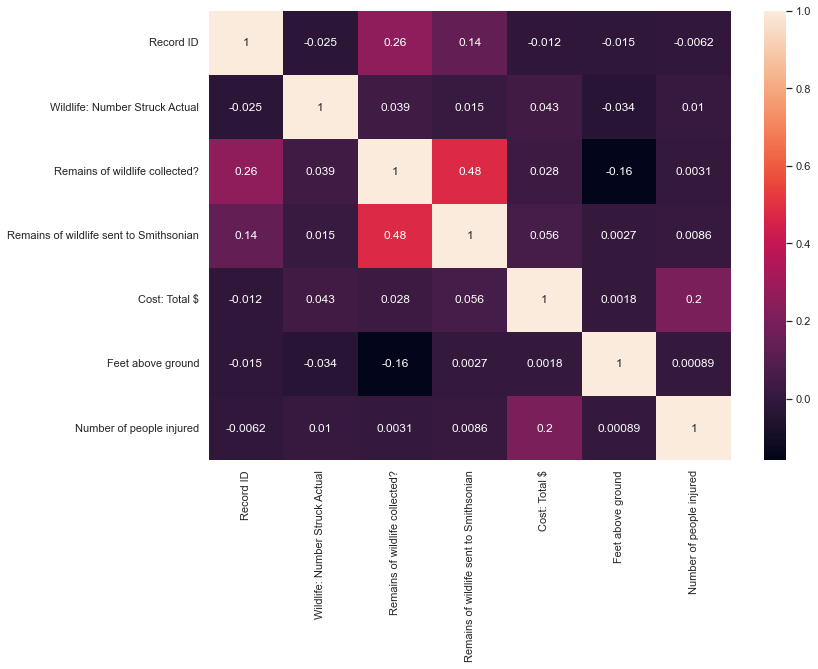

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(bs.corr(),annot=True)

### Drop rows which contain missing values in necessary fields 

In [35]:
bs.dropna(subset=['Aircraft: Type','Airport: Name', 'Altitude bin','Wildlife: Number struck','Effect: Impact to flight','FlightDate','Aircraft: Number of engines?','Aircraft: Airline/Operator','Origin State','When: Phase of flight','Wildlife: Size','Pilot warned of birds or wildlife?','Feet above ground','Is Aircraft Large?'],inplace=True)

### Checking for missing values again 

In [36]:
miss = bs.isnull().sum()
miss_p = (bs.isnull().sum()/len(bs))*100
miss_data = pd.concat([miss,miss_p],axis = 1,keys = ['Total','%'])
print(miss_data)

                                         Total    %
Record ID                                    0  0.0
Aircraft: Type                               0  0.0
Airport: Name                                0  0.0
Altitude bin                                 0  0.0
Aircraft: Make/Model                         0  0.0
Wildlife: Number struck                      0  0.0
Wildlife: Number Struck Actual               0  0.0
Effect: Impact to flight                     0  0.0
FlightDate                                   0  0.0
Effect: Indicated Damage                     0  0.0
Aircraft: Number of engines?                 0  0.0
Aircraft: Airline/Operator                   0  0.0
Origin State                                 0  0.0
When: Phase of flight                        0  0.0
Conditions: Precipitation                    0  0.0
Remains of wildlife collected?               0  0.0
Remains of wildlife sent to Smithsonian      0  0.0
Wildlife: Size                               0  0.0
Conditions: 

### Checking shape of data after cleaned 

In [37]:
bs.shape

(24747, 25)

### Export cleaned data into an excel file 

In [38]:
bs.to_excel('bird_strike_cleaned.xlsx',index = False)

# Answering the business problem

## 1. Visuals Depicting the Number of Bird Strikes:  

###  1.1 Yearly Analysis

(array([1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

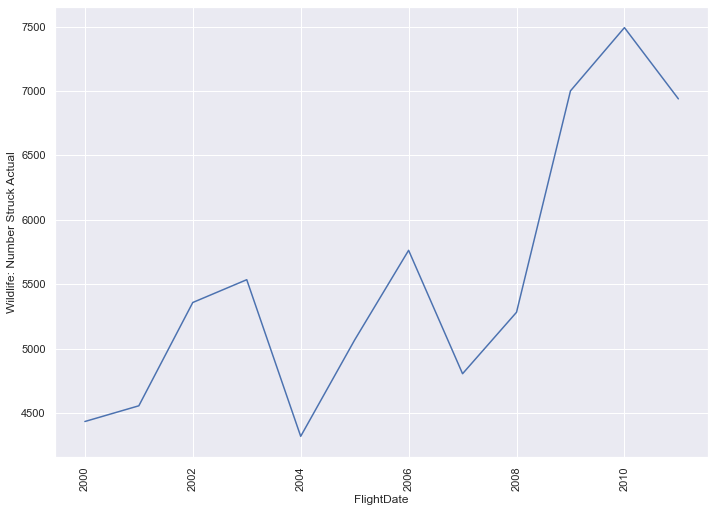

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby(bs['FlightDate'].map(lambda x: x.year))['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
dp=sns.lineplot(x=d['FlightDate'],y=d['Wildlife: Number Struck Actual'],data=bs)
plt.xticks(rotation=90)

###  1.2 Top 10 US Airlines in terms of having encountered bird strikes 

Text(0.5, 1.0, 'Top 10 US Airlines in terms of having encountered bird strikes')

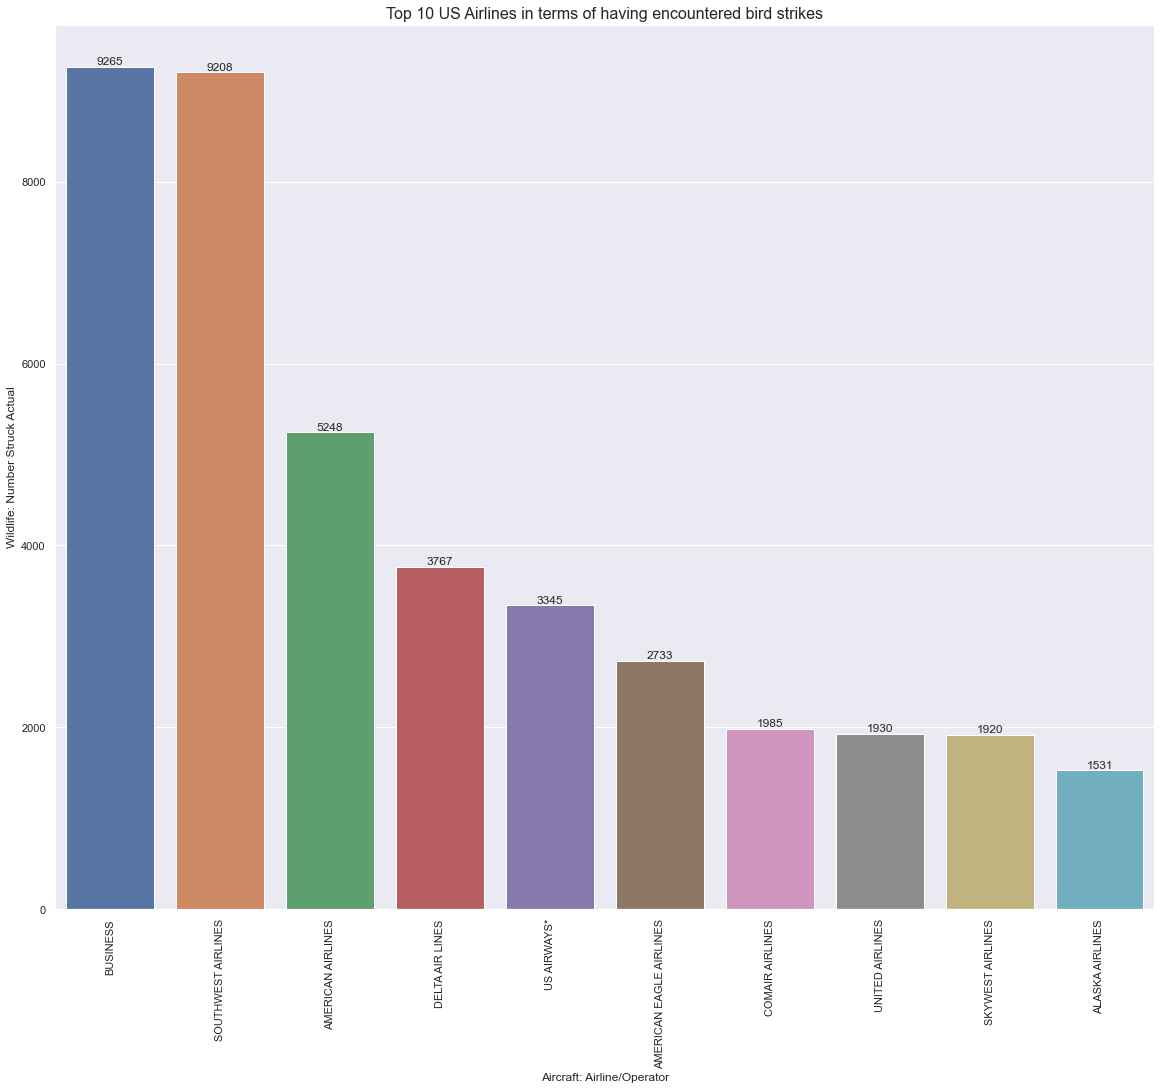

In [40]:
sns.set(rc={'figure.figsize':(19.7,16.27)})
d=bs.groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).head(10).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Aircraft: Airline/Operator'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 US Airlines in terms of having encountered bird strikes', fontsize=16)

### 1.3 Airports with most incidents of bird strikes – Top 50  

Text(0.5, 1.0, 'Airports with most incidents of bird strikes – Top 50')

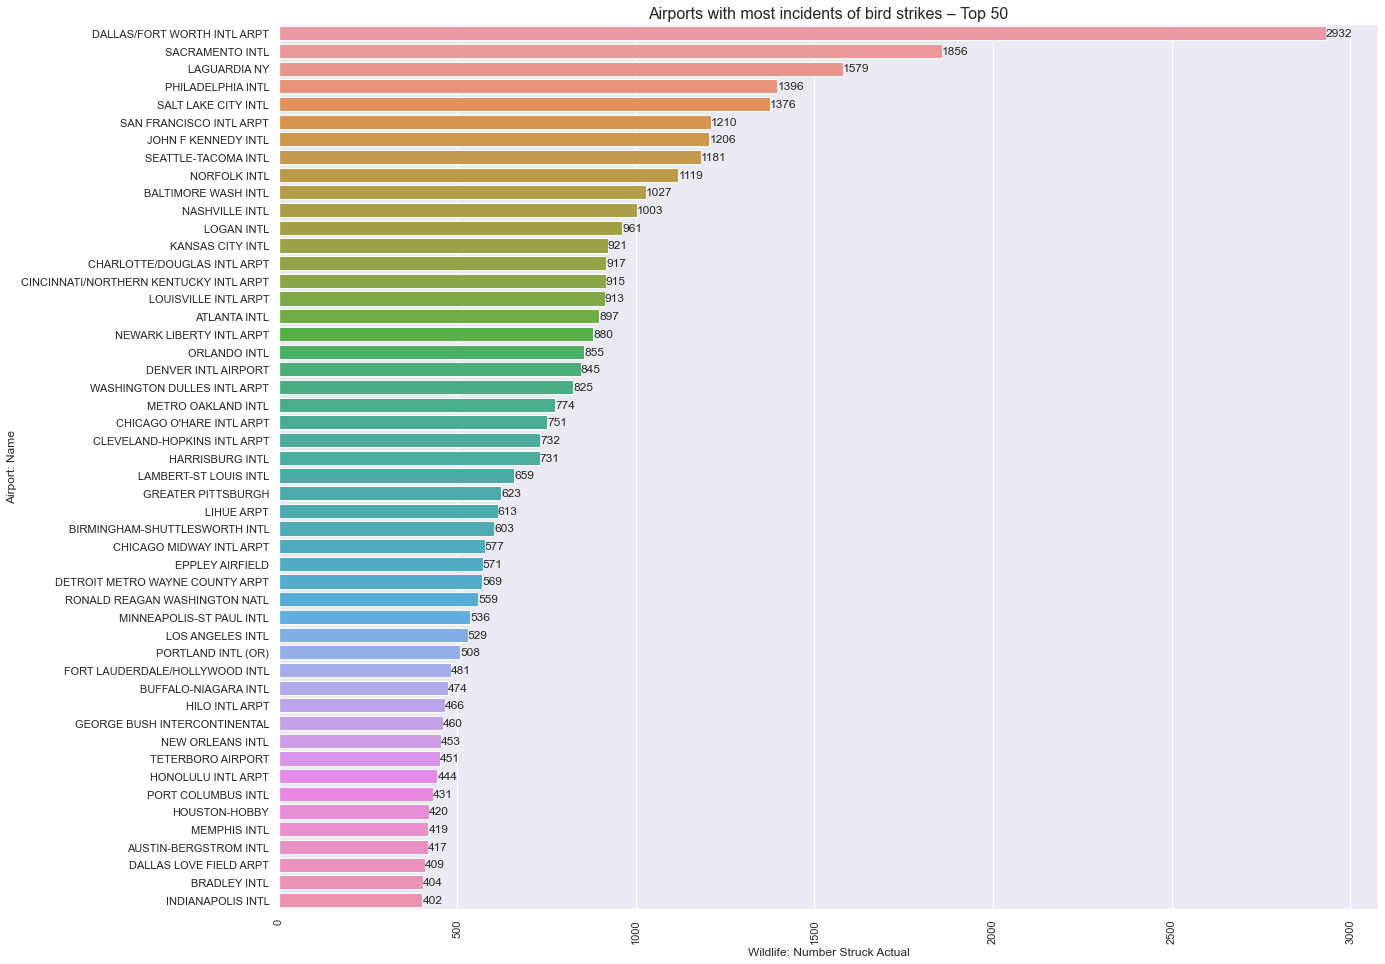

In [41]:
sns.set(rc={'figure.figsize':(19.7,16.27)})
d=bs.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).head(50).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Wildlife: Number Struck Actual'],y=d['Airport: Name'],data=bs,orient='h')
rt.bar_label(rt.containers[0])
plt.xticks(rotation=90)
plt.title('Airports with most incidents of bird strikes – Top 50', fontsize=16)

### 1.4 In which state most of the strike happened 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Texas'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Pennsylvania'),
  Text(5, 0, 'Illinois'),
  Text(6, 0, 'Hawaii'),
  Text(7, 0, 'Kentucky'),
  Text(8, 0, 'Ohio'),
  Text(9, 0, 'Missouri'),
  Text(10, 0, 'Virginia'),
  Text(11, 0, 'Tennessee'),
  Text(12, 0, 'New Jersey'),
  Text(13, 0, 'Washington'),
  Text(14, 0, 'Georgia'),
  Text(15, 0, 'North Carolina'),
  Text(16, 0, 'Utah'),
  Text(17, 0, 'DC'),
  Text(18, 0, 'Michigan'),
  Text(19, 0, 'Colorado'),
  Text(20, 0, 'Massachusetts'),
  Text(21, 0, 'Maryland'),
  Text(22, 0, 'Indiana'),
  Text(23, 0, 'Louisiana'),
  Text(24, 0, 'Connecticut'),
  Text(25, 0, 'Nebraska'),
  Text(26, 0, 'Alabama'),
  Te

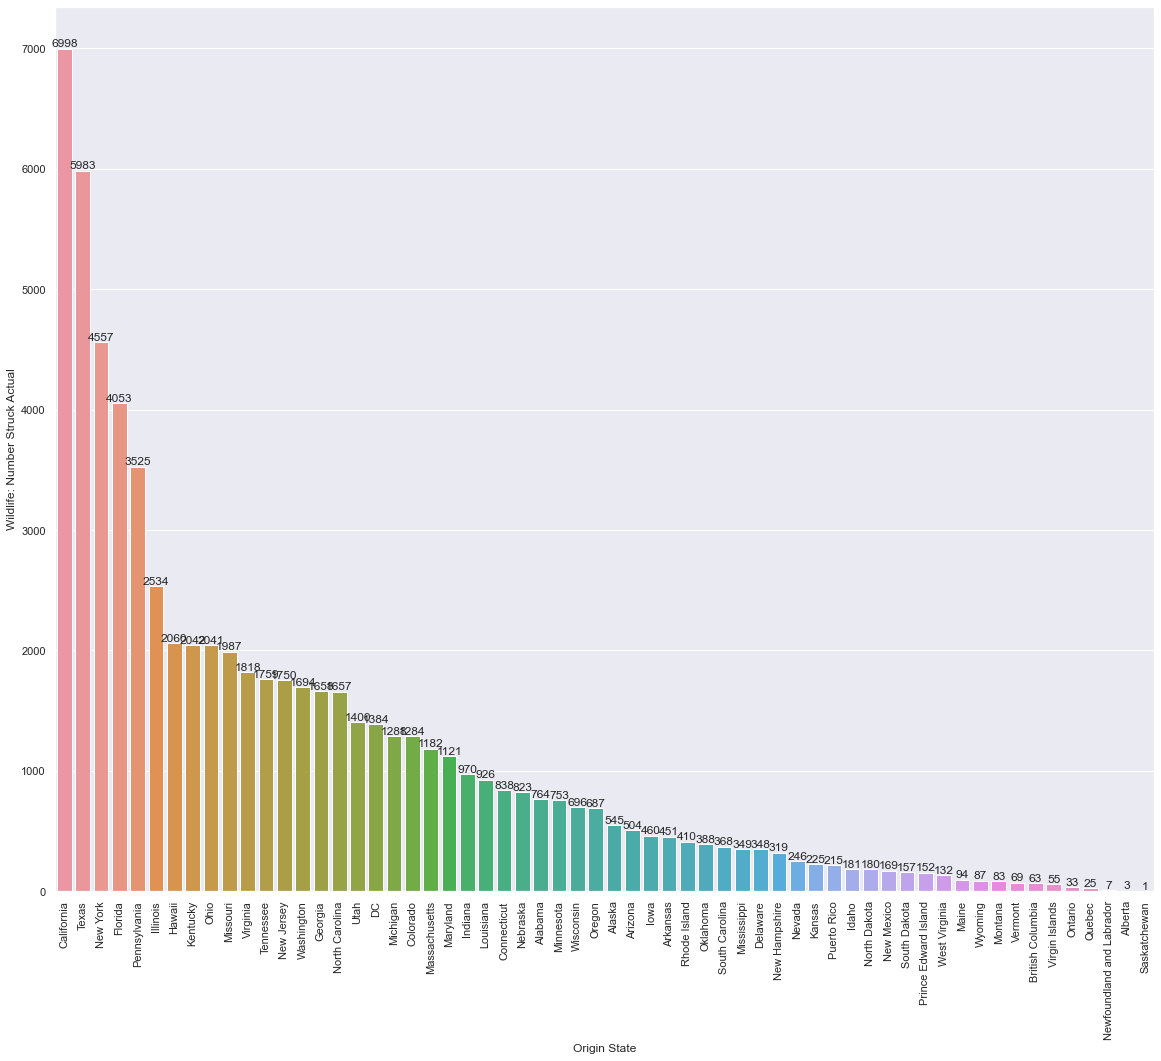

In [42]:
sns.set(rc={'figure.figsize':(19.7,16.27)})
d=bs.groupby('Origin State')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
pprt=sns.barplot(x=d['Origin State'],y=d['Wildlife: Number Struck Actual'],data=bs)
pprt.bar_label(pprt.containers[0])
plt.xticks(rotation=90)

## 2. Yearly Cost Incurred due to Bird Strikes:  

(array([1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

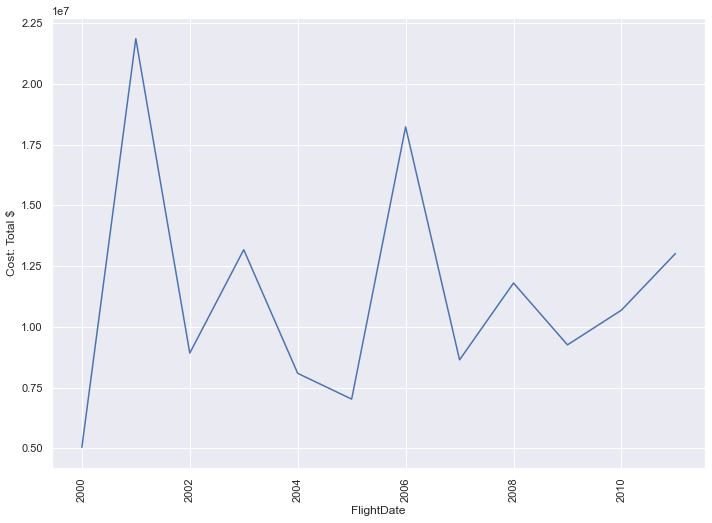

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby(bs['FlightDate'].map(lambda x: x.year))['Cost: Total $'].sum().sort_values(ascending=False).reset_index(name='Cost: Total $')
dp=sns.lineplot(x=d['FlightDate'],y=d['Cost: Total $'],data=bs)
plt.xticks(rotation=90)

## 3. When do most bird strikes occur? 

### 3.1 In which condition of the sky most bird strikes occur? 

[Text(0, 0, '31157'), Text(0, 0, '21824'), Text(0, 0, '13570')]

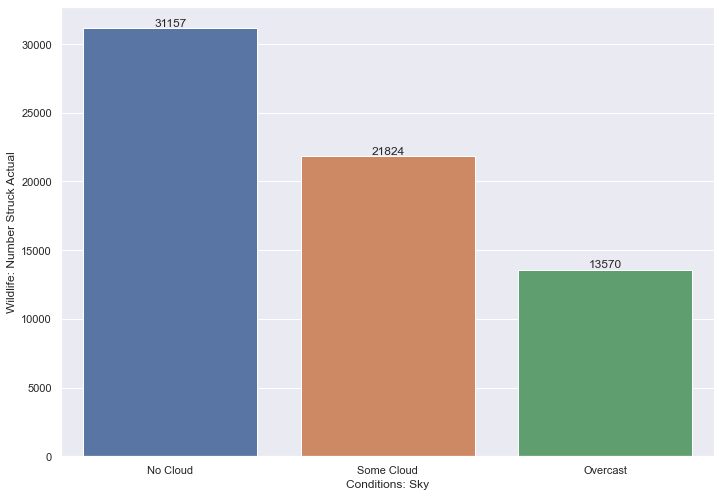

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('Conditions: Sky')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Conditions: Sky'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])

### 3.2 Altitude of airplanes at the time of strike 

[Text(0, 0, '58007'), Text(0, 0, '8544')]

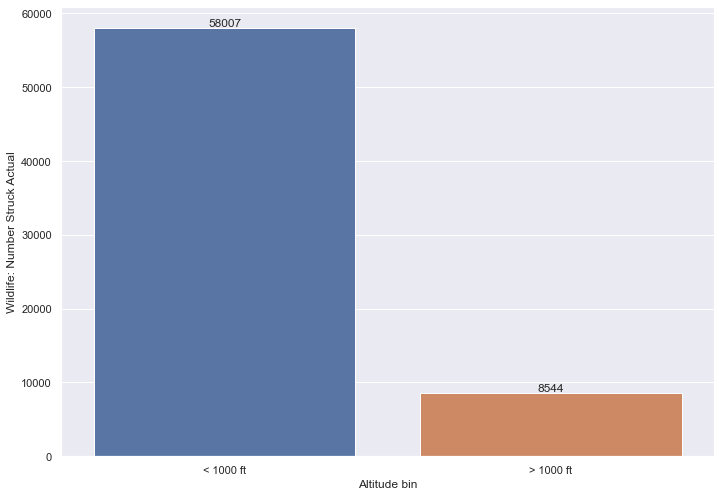

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Altitude bin'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])

### 3.3 Phase of flight at the time of strike 

[Text(0, 0, '24111'),
 Text(0, 0, '14097'),
 Text(0, 0, '13650'),
 Text(0, 0, '13318'),
 Text(0, 0, '1171'),
 Text(0, 0, '192'),
 Text(0, 0, '12')]

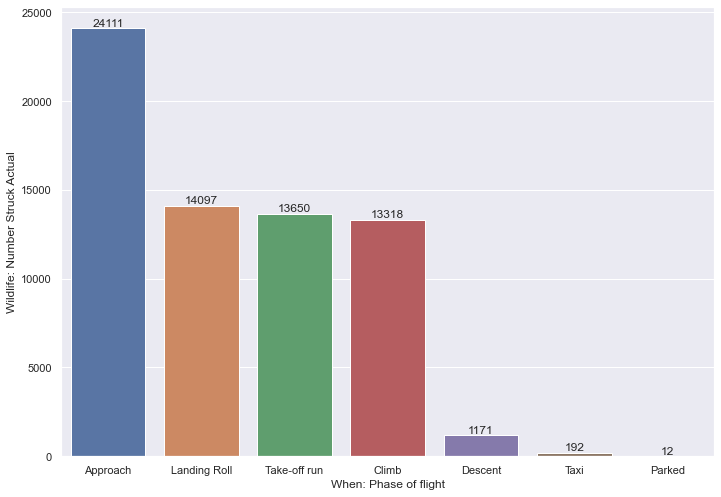

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('When: Phase of flight')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['When: Phase of flight'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])

### 3.4 Precipitation at the time of strike 

[Text(0, 0, '59695'),
 Text(0, 0, '4346'),
 Text(0, 0, '1735'),
 Text(0, 0, '394'),
 Text(0, 0, '351'),
 Text(0, 0, '20'),
 Text(0, 0, '6'),
 Text(0, 0, '4')]

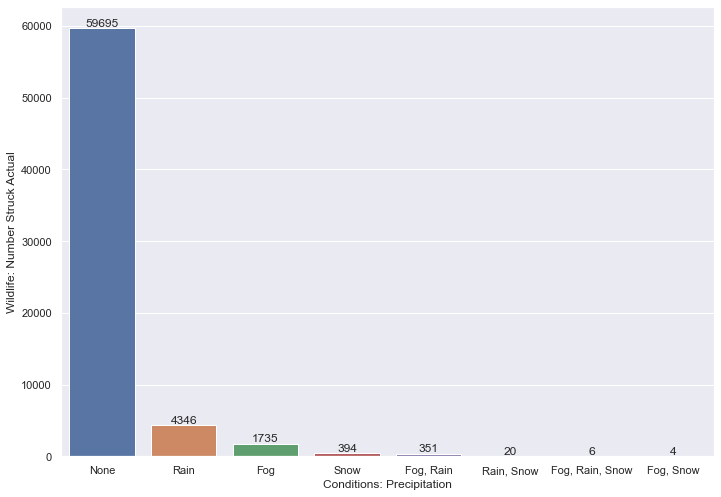

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('Conditions: Precipitation')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Conditions: Precipitation'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])

## 4. Effect of Bird Strikes: 

### 4.1 Impact on Flight  

[Text(0, 0, '22752'),
 Text(0, 0, '1066'),
 Text(0, 0, '468'),
 Text(0, 0, '376'),
 Text(0, 0, '85')]

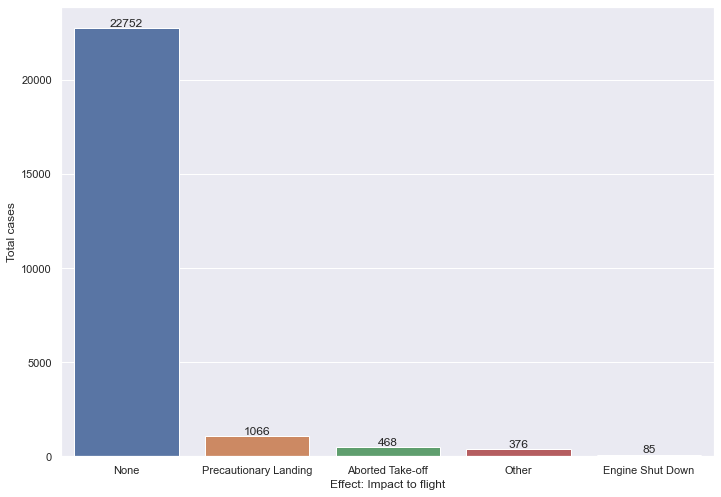

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('Effect: Impact to flight')['Record ID'].count().sort_values(ascending=False).reset_index(name='Record ID')
rt=sns.barplot(x=d['Effect: Impact to flight'],y=d['Record ID'],data=bs)
rt.set(ylabel='Total cases')
rt.bar_label(rt.containers[0])

### 4.2  Effect of Strike at Different Altitude 

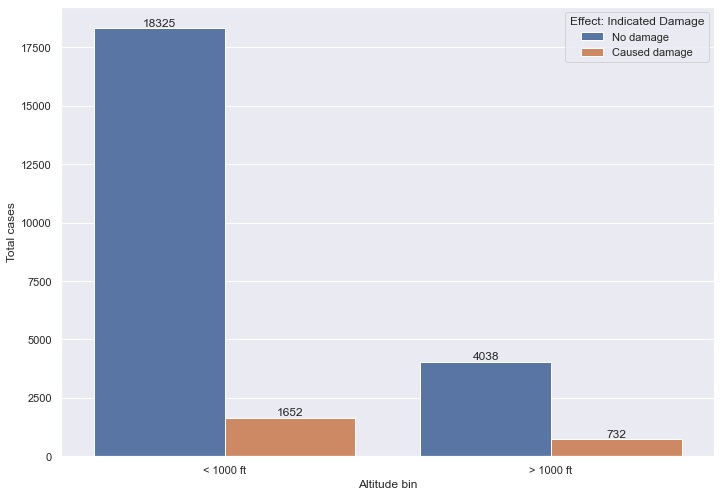

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby(['Altitude bin','Effect: Indicated Damage'])['Record ID'].count().sort_values(ascending=False).reset_index(name='Record ID')
rt=sns.barplot(x=d['Altitude bin'],y=d['Record ID'], hue = d['Effect: Indicated Damage'], data=bs)
rt.set(ylabel='Total cases')
for container in rt.containers:
    rt.bar_label(container)

### 4.3 Were Pilots Informed? 

[Text(0, 0, '14092'), Text(0, 0, '10655')]

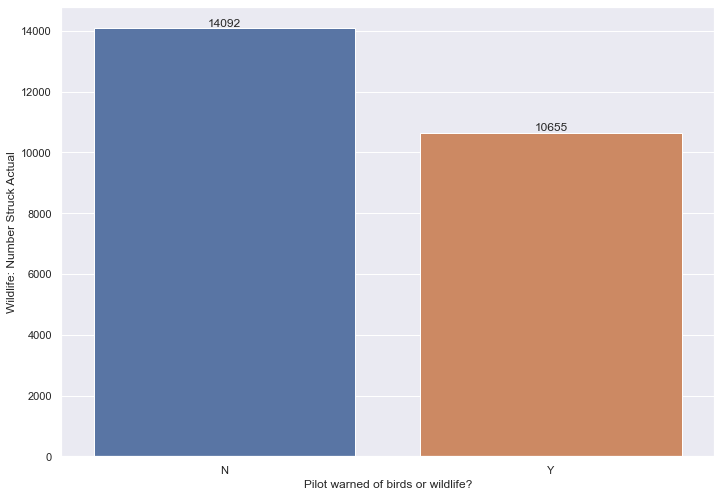

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('Pilot warned of birds or wildlife?')['Wildlife: Number Struck Actual'].count().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Pilot warned of birds or wildlife?'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])

### 4.4 Prior Warning and Effect of Strike Relation 

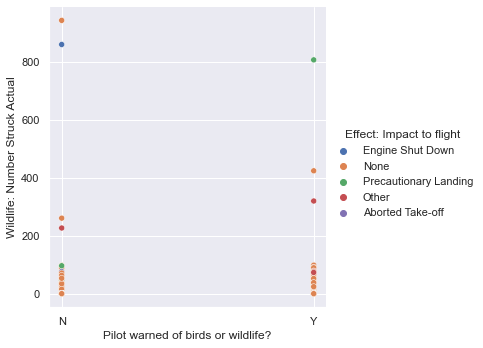

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(data=bs, x="Pilot warned of birds or wildlife?", y="Wildlife: Number Struck Actual", hue ="Effect: Impact to flight")

## 5. Wildlife size vs bird strike: 

[Text(0, 0, '50637'), Text(0, 0, '11654'), Text(0, 0, '4260')]

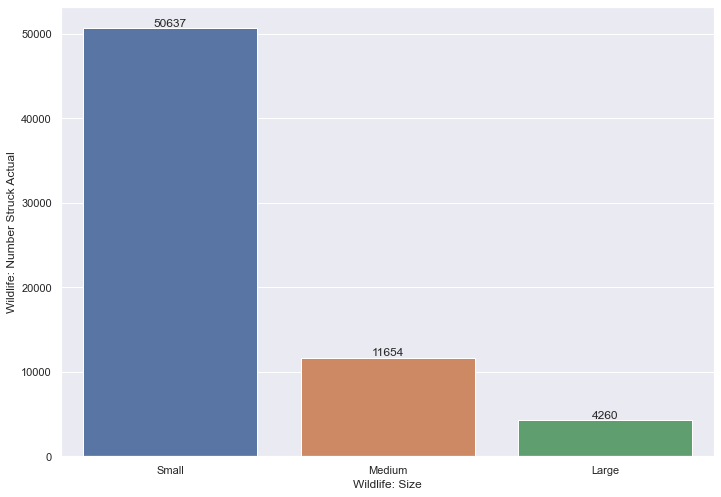

In [52]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('Wildlife: Size')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Wildlife: Size'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])

## 6. Aircraft description: 

### 6.1 No. of engines vs bird strikes 

[Text(0, 0, '61439'),
 Text(0, 0, '2361'),
 Text(0, 0, '1535'),
 Text(0, 0, '1215'),
 Text(0, 0, '1')]

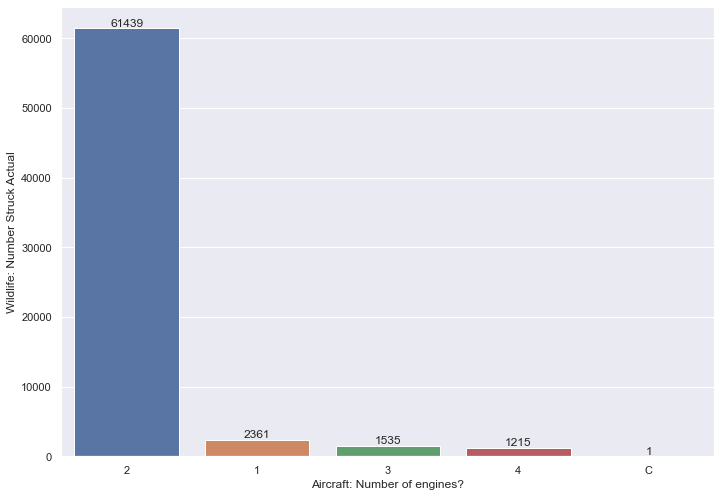

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=bs.groupby('Aircraft: Number of engines?')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False).reset_index(name='Wildlife: Number Struck Actual')
rt=sns.barplot(x=d['Aircraft: Number of engines?'],y=d['Wildlife: Number Struck Actual'],data=bs)
rt.bar_label(rt.containers[0])

### 6.2 Aircraft size vs bird strikes 

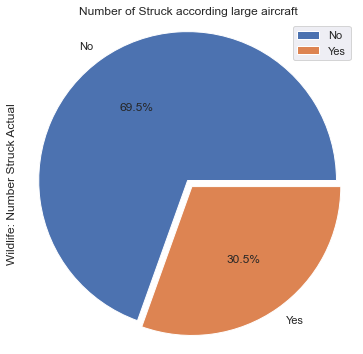

In [54]:
bs.groupby(['Is Aircraft Large?']).sum().plot(kind='pie', y ='Wildlife: Number Struck Actual', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%', title='Number of Struck according large aircraft')
plt.axis('equal')
plt.show()


# Conclusion:

<ul>
    <li> Business Airlines and Southwest Airlines caused more Bird Strikes. </li>
    <li> The top airports with maximum bird strikes are DALLAS/FORT WORTH INTL ARPT, SACRAMENTO INTL, and LAGUARDIA NY. </li>
    <li> The top 3 states where most bird strikes happen are California, Texas, and New York respectively. </li>
    <li> Most of the Bird Strikes happened with no clouds. </li>
    <li> Moost of the total number of bird strikes happened at the altitude &lt 1000 ft. </li>
    <li> Most of the bird strikes happen during the Approach, Landing roll, Take-off run, and Climb flight phases respectively.  </li>
    <li> Precipitation does not affect that much in Bird Strikes. </li>
    <li> In most cases, there are no impacts in flight due to Bird Strikes. In some cases, precautionary landing and others impacts were observed. </li>
    <li> Maximum of time pilots were not informed about wildlife. </li>
    <li> Most of the Bird Strikes happened with small size wildlife. </li>
    <li> 69.53% Aircraft size is not large. Most of cases bird strikes happened with 2-engine aircraft. </li>
</ul>    